# Downloading Packages

In [1]:
!pip install easyocr
!pip install imutils

You should consider upgrading via the 'C:\Users\adnan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\adnan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Importing Packages

In [36]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

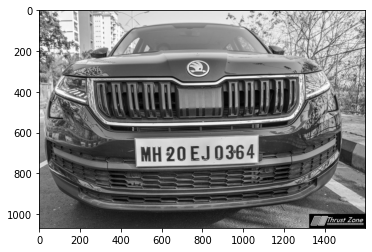

In [49]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

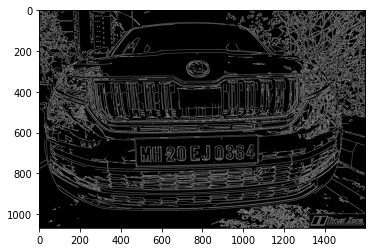

In [50]:
bfilter = cv2.bilateralFilter(gray , 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [51]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [52]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour , 10 , True)
    if len(approx) == 4:
        location = approx
        break

In [53]:
location

array([[[1075,  611]],

       [[1072,  749]],

       [[ 474,  765]],

       [[ 468,  626]]], dtype=int32)

In [54]:
mask = np.zeros(gray.shape , np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img , img,mask=mask)


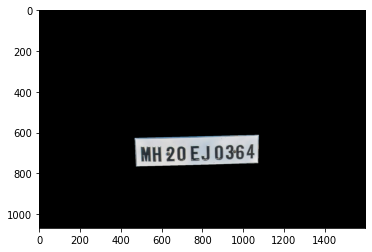

In [55]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [56]:
(x, y) = np.where(mask == 255)
(x1 , y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1 , y1:y2+1]

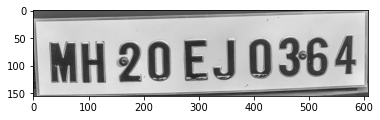

In [57]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# OCR

In [58]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[23, 31], [603, 31], [603, 144], [23, 144]],
  'MH 20 EJ 0364',
  0.7650929385351155)]

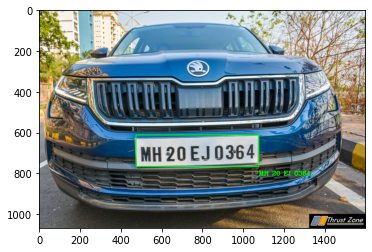

In [59]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text=text , org=(approx[0][0][0],approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))